# Simulations light inter

In [1]:
from __future__ import annotations

import sys
import time as t

import matplotlib.pyplot as plt
import numpy as np

sys.path.append("../data") 
from archi_dict import archi_maize as archi
from oawidgets.plantgl import *  # noqa: F403

from openalea.archicrop.display import build_scene, display_scene  # noqa: F401
from openalea.archicrop.simulation import (
    plot_constained_vs_pot,
    plot_constrainted_vs_realized,
    plot_nrj_per_plant,
    run_simulations,
)
from openalea.plantgl.all import Color3, Material, Scene  # noqa: F401

%gui qt

In [2]:
stics_color = "orange"
archicrop_color = "green"

In [3]:
tec_file_xml='../data/Mais_tec.xml'
plt_file_xml='../data/corn_plt.xml'
stics_output_file='../data/mod_smaize.sti'
weather_file = '../data/climaisj.meteo'
location = {  
'longitude': 3.87,
'latitude': 45,
'altitude': 800,
'timezone': 'Europe/Paris'}

In [ ]:

start_time = t.time()

daily_dynamics, params_sets, pot_la, pot_h, realized_la, realized_h, nrj_per_plant, mtgs, filters, sowing_density = run_simulations(
    archi_params=archi, 
    tec_file=tec_file_xml, 
    plant_file=plt_file_xml, 
    dynamics_file=stics_output_file, 
    weather_file=weather_file,
    location=location,
    n_samples=100,
    latin_hypercube=True,
    opt_filter_organ_duration=False,
    opt_filter_pot_growth=True,
    opt_filter_realized_growth=True,
    light_inter=False,
    error_LA_pot=0.5,
    error_height_pot=0.5,
    error_LA_realized=0.2,
    error_height_realized=0.2,
    seed=18)

end_time = t.time()

elapsed_time = (end_time - start_time)/60
print(f"Elapsed time: {elapsed_time:.4f} minutes for {len(realized_la)} simulations")  # noqa: T201


Elapsed time: 1.9737 minutes for 100 simulations


In [5]:
# Retrieve STICS growth and senescence dynamics
dates = [value["Date"] for value in daily_dynamics.values()]
thermal_time = [value["Thermal time"] for value in daily_dynamics.values()]
leaf_area_plant = [value["Plant leaf area"] for value in daily_dynamics.values()]
sen_leaf_area_plant = [value["Plant senescent leaf area"] for value in daily_dynamics.values()]
height_canopy = [value["Plant height"] for value in daily_dynamics.values()]
par_incident = [value["Incident PAR"] for value in daily_dynamics.values()]
par_stics = [value["Absorbed PAR"] for value in daily_dynamics.values()]

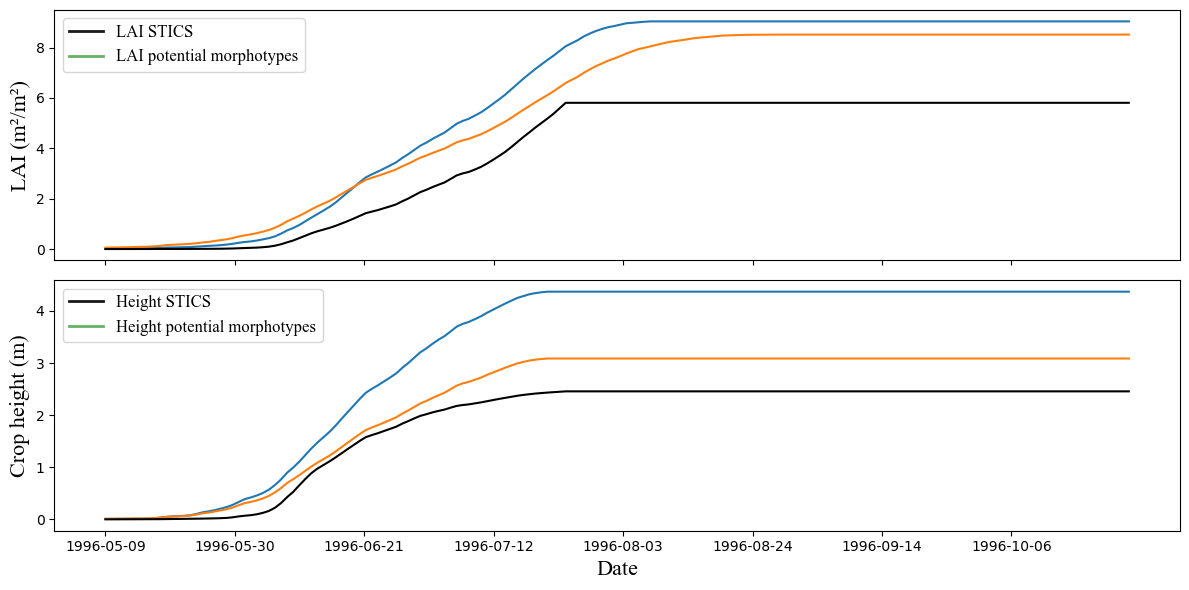

In [6]:
plot_constained_vs_pot(dates, pot_la, pot_h, leaf_area_plant, height_canopy, sowing_density, stics_color="black")

In [7]:
for key, value in params_sets.items():
    # if filters[key]['filter_1'] and filters[key]['filter_2']:
    #         print(value)
    if filters[key]['filter_3']:
            print(value)

{'diam_base': 2.2, 'diam_top': 1.2, 'klig': 0.6, 'swmax': 0.55, 'f1': 0.64, 'f2': 0.92, 'insertion_angle': 35, 'scurv': 0.7, 'curvature': 120, 'phyllotactic_angle': 137.5, 'phyllotactic_deviation': 0, 'nb_tillers': 0, 'tiller_delay': 1, 'tiller_angle': 30, 'reduction_factor': 1, 'plant_orientation': 0, 'leaf_lifespan': 200.0, 'nb_phy': 10, 'nb_short_phy': 3, 'short_phy_height': 3.5216, 'stem_q': 0.9698, 'rmax': 0.7881, 'skew': 0.0094, 'wl': 0.1121, 'phyllochron': 37.2981, 'plastochron': 48.1574, 'height': 437.063, 'leaf_area': 9517.0115}
{'diam_base': 2.2, 'diam_top': 1.2, 'klig': 0.6, 'swmax': 0.55, 'f1': 0.64, 'f2': 0.92, 'insertion_angle': 35, 'scurv': 0.7, 'curvature': 120, 'phyllotactic_angle': 137.5, 'phyllotactic_deviation': 0, 'nb_tillers': 0, 'tiller_delay': 1, 'tiller_angle': 30, 'reduction_factor': 1, 'plant_orientation': 0, 'leaf_lifespan': 200.0, 'nb_phy': 9, 'nb_short_phy': 3, 'short_phy_height': 4.8736, 'stem_q': 0.9756, 'rmax': 0.5278, 'skew': 0.0085, 'wl': 0.115, 'phyl

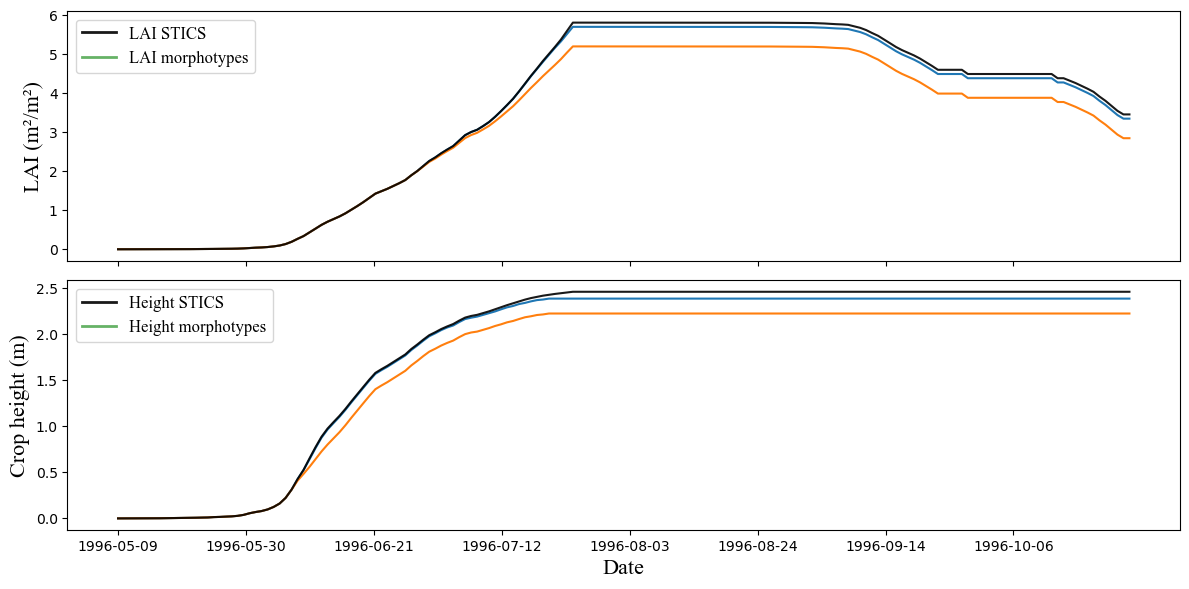

In [8]:
plot_constrainted_vs_realized(dates=dates, 
                              LA_archicrop=realized_la, 
                              height_archicrop=realized_h, 
                              leaf_area_plant=leaf_area_plant, 
                              sen_leaf_area_plant=sen_leaf_area_plant, 
                              height_canopy=height_canopy, 
                              sowing_density=sowing_density,
                              stics_color="black")


In [9]:
# Energy in Caribu : W = 0.0864 MJ.day-1
# Irradiance in Caribu : W.m-2 = 0.0864 MJ.m[leaf]-2.day-1
# Incident PAR in STICS : MJ.m[soil]-2.day-1
# Absorbed PAR in STICS : MJ.m[soil]-2.day-1

In [10]:
if nrj_per_plant[0][0] is not None:
    plot_nrj_per_plant(dates, nrj_per_plant, par_incident, par_stics, sowing_density)

In [11]:
# see if sum eabs and esoil = 1
# see tests caribu (cf light vege manager in oa incubator)
# compute memory 

$$ raint(t)=0.95⋅parsurrgG⋅trg(t)⋅(1−exp(−extinP⋅(lai(t)+eai(t)))) $$

$$ parsurrgG = 0.48 $$

$$ extinP(maize) = 0.7 $$

In [12]:
"""
# vertical light interception
cs, ei, df = illuminate(scene, scene_unit='cm')
cs.plot(ei)


# diffuse light interception
sources = skys.sky_sources()
cs, ei, df = illuminate(scene, light=sources, scene_unit='cm')
cs.plot(ei)

# get score per plant
def score(res):
    return pd.Series({'ei':(res.Ei*res.area).sum() / res.area.sum(),
                              'area': res.area.sum()})
df['nump']=nump
df.groupby('nump').apply(score)
"""

"\n# vertical light interception\ncs, ei, df = illuminate(scene, scene_unit='cm')\ncs.plot(ei)\n\n\n# diffuse light interception\nsources = skys.sky_sources()\ncs, ei, df = illuminate(scene, light=sources, scene_unit='cm')\ncs.plot(ei)\n\n# get score per plant\ndef score(res):\n    return pd.Series({'ei':(res.Ei*res.area).sum() / res.area.sum(),\n                              'area': res.area.sum()})\ndf['nump']=nump\ndf.groupby('nump').apply(score)\n"